In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.python.keras as keras

2023-02-20 10:48:00.018977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 10:48:00.096643: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-20 10:48:00.469592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-20 10:48:00.469634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
for i in range(28):
    for j in range(28):
        print(f'{x_train[0][i][j]:3}', end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

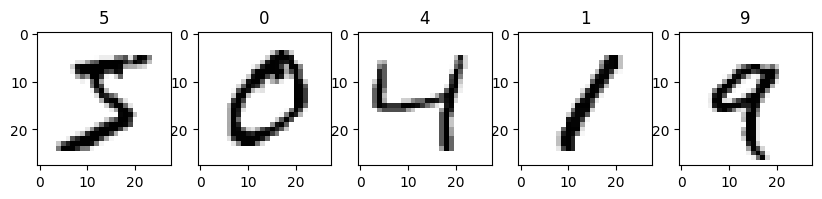

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].set_title(y_train[i])

plt.show()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


2023-02-20 10:48:11.815796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 10:48:11.835242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 10:48:11.835374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 10:48:11.835700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 743us/step - loss: 0.2142 - accuracy: 0.9358
Epoch 2/15
1875/1875 [==============================] - 1s 711us/step - loss: 0.0894 - accuracy: 0.9720
Epoch 3/15
1875/1875 [==============================] - 1s 703us/step - loss: 0.0613 - accuracy: 0.9804
Epoch 4/15
1875/1875 [==============================] - 1s 708us/step - loss: 0.0456 - accuracy: 0.9851
Epoch 5/15
1875/1875 [==============================] - 1s 715us/step - loss: 0.0349 - accuracy: 0.9885
Epoch 6/15
1875/1875 [==============================] - 1s 718us/step - loss: 0.0268 - accuracy: 0.9910
Epoch 7/15
1875/1875 [==============================] - 1s 701us/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/15
1875/1875 [==============================] - 1s 698us/step - loss: 0.0200 - accuracy: 0.9934
Epoch 9/15
1875/1875 [==============================] - 1s 710us/step - loss: 0.0187 - accuracy: 0.9935
Epoch 10/15
1875/1875 [==============================] - 1s 702u

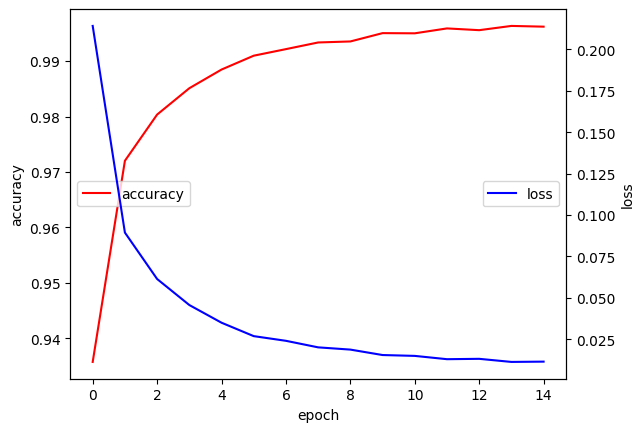

In [10]:
fig, axes = plt.subplots()
taxes = axes.twinx()

axes.plot(history.history['accuracy'], label='accuracy', color='red')
axes.set_ylabel('accuracy')
axes.legend(loc='center left')

taxes.plot(history.history['loss'], label='loss', color='blue')
taxes.set_ylabel('loss')
taxes.legend(loc='center right')

axes.set_xlabel('epoch')

plt.show()

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 693us/step - loss: 0.1369 - accuracy: 0.9755


[0.13686180114746094, 0.9754999876022339]

In [12]:
model.save('model.h5')